# FEATURES

In [12]:
#Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize



## First, we examine the text in the dataset, to get a more detailed understanding of the dataset

### Average word length

In [40]:
avg_wordl_df=pd.read_csv('text_balanced_subset.csv')
def average_word_length(text):
    words = text.split()
    if len(words) == 0:
        return 0
    return sum(len(word) for word in words) / len(words)

# Apply the function to calculate average word length
avg_wordl_df['average_word_length'] = avg_wordl_df['cleaned_text'].apply(average_word_length)
avg_wordl_df

,label,cleaned_text,cleaned_subject,cleaned_title,token_count,average_word_length
0,1,maniac want handmaid tale become realityaborti...,news,watch republican lawmaker claim forcing woman ...,71,6.264822
1,0,washington reuters senate main investigation a...,politicsnews,senate give limited resource russia electionme...,106,7.106426
2,1,mean burn city downattorneys six police office...,politics,shocking cop attorney claim baltimore prosecut...,74,6.584098
3,1,secret donald trump got lot help russian gover...,news,democrat introduce legislation probe russian v...,77,6.635983
4,1,chuck norris wrote jade helm 15 commentary con...,leftnews,jade helm 15 really martial law texas ranger r...,102,6.618005
...,...,...,...,...,...,...
13829,0,washingtoncalgary alberta reuters u president ...,politicsnews,trump greenlights keystone xl pipeline obstacl...,114,6.357553
13830,1,internet destroying trump administration press...,news,watch former clinton aide blast lying sean spi...,72,5.843220
13831,0,erbil iraqbaghdad reuters u vice president joe...,politicsnews,biden visit iraq show support amid multiple cr...,132,5.940358
13832,0,caracas reuters president nicolas maduro defen...,worldnews,venezuela maduro defends disputed vote opposit...,124,6.930876


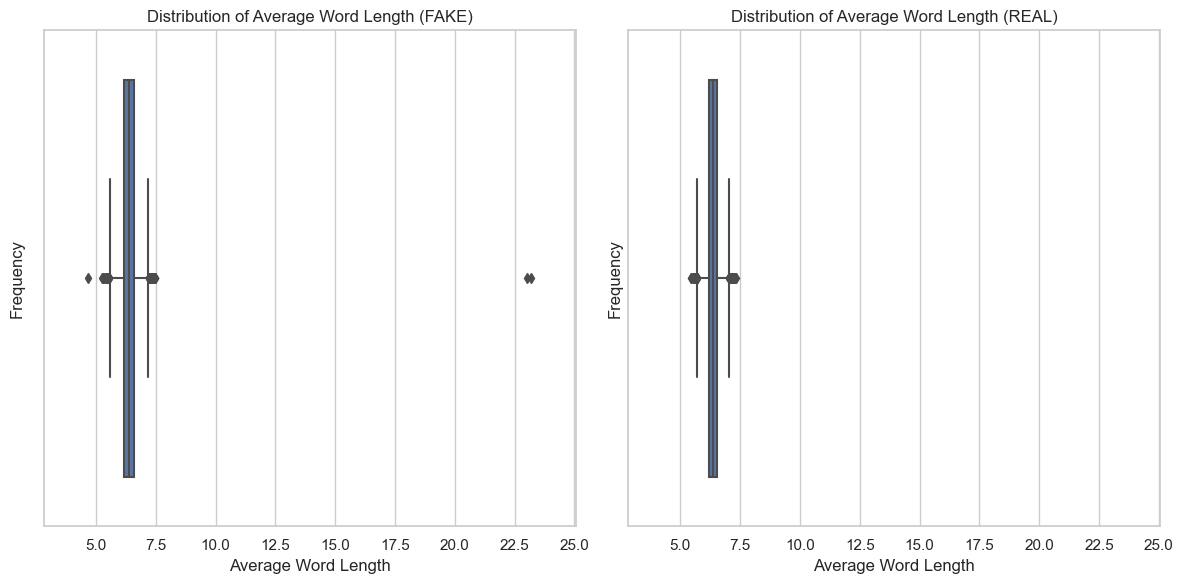

In [41]:
min_length = avg_wordl_df['average_word_length'].min()
max_length = avg_wordl_df['average_word_length'].max()

# Optionally, add a buffer around the range to ensure all data points are clearly visible
buffer = (max_length - min_length) * 0.1
x_min = min_length - buffer
x_max = max_length + buffer

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a figure with two subplots (axes)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Boxplot for entries with label=1
sns.boxplot(x=avg_wordl_df[avg_wordl_df['label'] == 1]['average_word_length'], ax=axes[0])
axes[0].set_title('Distribution of Average Word Length (FAKE)')
axes[0].set_xlabel('Average Word Length')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim([x_min, x_max])  # Set common x-axis range

# Boxplot for entries with label=0
sns.boxplot(x=avg_wordl_df[avg_wordl_df['label'] == 0]['average_word_length'], ax=axes[1])
axes[1].set_title('Distribution of Average Word Length (REAL)')
axes[1].set_xlabel('Average Word Length')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim([x_min, x_max])  # Set common x-axis range

# Display the plots
plt.tight_layout()
plt.show()

### TF-IDF 

We want to examine whether some words are more important than others, in determining whether it is fake or real news, which will be done by using TF-IDF.

In [43]:
importance_df = pd.read_csv('text_balanced_subset.csv')

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Apply TF-IDF to the 'cleaned_text' column and create the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(importance_df['cleaned_text'])

In [16]:
# Convert the TF-IDF matrix to a DataFrame for easier manipulation
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [17]:
# Display the first few rows of the DataFrame
print(tfidf_df.head())

    00  000  0000  000000017  000004  00009  0006  0009  000938sz  \
0  0.0  0.0   0.0        0.0     0.0    0.0   0.0   0.0       0.0   
1  0.0  0.0   0.0        0.0     0.0    0.0   0.0   0.0       0.0   
2  0.0  0.0   0.0        0.0     0.0    0.0   0.0   0.0       0.0   
3  0.0  0.0   0.0        0.0     0.0    0.0   0.0   0.0       0.0   
4  0.0  0.0   0.0        0.0     0.0    0.0   0.0   0.0       0.0   

   000dillon000  ...  zynga  zypries  zyries  zyuganov  zyuseragentifzxzbreak  \
0           0.0  ...    0.0      0.0     0.0       0.0                    0.0   
1           0.0  ...    0.0      0.0     0.0       0.0                    0.0   
2           0.0  ...    0.0      0.0     0.0       0.0                    0.0   
3           0.0  ...    0.0      0.0     0.0       0.0                    0.0   
4           0.0  ...    0.0      0.0     0.0       0.0                    0.0   

    zz  zztaine  zzzzaaaacccchhh  zzzzzzzzzzzzz  émigré  
0  0.0      0.0              0.0        

Now we look into the importance of different words in the dataset.
We look at what words are the most important for fake news and real news.

In [18]:
# Filter DataFrame for real news (label 0)
real_news_df = importance_df[importance_df['label'] == 0]

# Filter DataFrame for fake news (label 1)
fake_news_df = importance_df[importance_df['label'] == 1]

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Apply TF-IDF to the 'cleaned_text' column of real news
tfidf_matrix_real = tfidf_vectorizer.fit_transform(real_news_df['cleaned_text'])

# Convert TF-IDF matrix to DataFrame for real news
tfidf_df_real = pd.DataFrame(tfidf_matrix_real.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Apply TF-IDF to the 'cleaned_text' column of fake news
tfidf_matrix_fake = tfidf_vectorizer.fit_transform(fake_news_df['cleaned_text'])

# Convert TF-IDF matrix to DataFrame for fake news
tfidf_df_fake = pd.DataFrame(tfidf_matrix_fake.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Identify the most important words based on their TF-IDF scores for real news
top_words_real = tfidf_df_real.max().sort_values(ascending=False)

# Identify the most important words based on their TF-IDF scores for fake news
top_words_fake = tfidf_df_fake.max().sort_values(ascending=False)

# Display the top N most important words for real news
N = 10  # You can change this value to display more or fewer words
print("Top", N, "Most Important Words for Real News:")
print(top_words_real.head(N))

# Display the top N most important words for fake news
print("\nTop", N, "Most Important Words for Fake News:")
print(top_words_fake.head(N))

Top 10 Most Important Words for Real News:
mica         0.859176
moreno       0.854600
taiwan       0.821148
koch         0.813523
wray         0.809352
pakistan     0.804291
lotte        0.803965
thiel        0.798404
elector      0.798348
jerusalem    0.797039
dtype: float64

Top 10 Most Important Words for Fake News:
phoenixnewtimes    0.905110
scotusblog         0.895832
petrov             0.870686
popick             0.869683
pavarotti          0.860920
schlafly           0.843167
schiller           0.816615
dao                0.808910
silverman          0.803492
sabo               0.802741
dtype: float64


## Secondly, we examine the dataset more in depth and create relevant features to explore the data further

### SENTIMENT ANALYSIS

In [44]:
sentiment_df = pd.read_csv('text_balanced_subset.csv')

In [45]:
# Function to apply sentiment analysis
def analyze_sentiment(text):
    testimonial = TextBlob(text)
    return testimonial.sentiment.polarity, testimonial.sentiment.subjectivity

# Applying sentiment analysis to the 'cleaned_text' and 'cleaned_title' columns
sentiment_df['text_polarity'], sentiment_df['text_subjectivity'] = zip(*sentiment_df['cleaned_text'].apply(analyze_sentiment))
sentiment_df['title_polarity'], sentiment_df['title_subjectivity'] = zip(*sentiment_df['cleaned_title'].apply(analyze_sentiment))

print(sentiment_df.head())

   label                                       cleaned_text cleaned_subject  \
0      1  maniac want handmaid tale become realityaborti...            news   
1      0  washington reuters senate main investigation a...    politicsnews   
2      1  mean burn city downattorneys six police office...        politics   
3      1  secret donald trump got lot help russian gover...            news   
4      1  chuck norris wrote jade helm 15 commentary con...        leftnews   

                                       cleaned_title  token_count  \
0  watch republican lawmaker claim forcing woman ...           71   
1  senate give limited resource russia electionme...          106   
2  shocking cop attorney claim baltimore prosecut...           74   
3  democrat introduce legislation probe russian v...           77   
4  jade helm 15 really martial law texas ranger r...          102   

   text_polarity  text_subjectivity  title_polarity  title_subjectivity  
0       0.013132           0.418700 

To better interpret both subjectivity and polarity of the titles and the text in the articles, we have created a scatter plot diagram below containing all data combined:



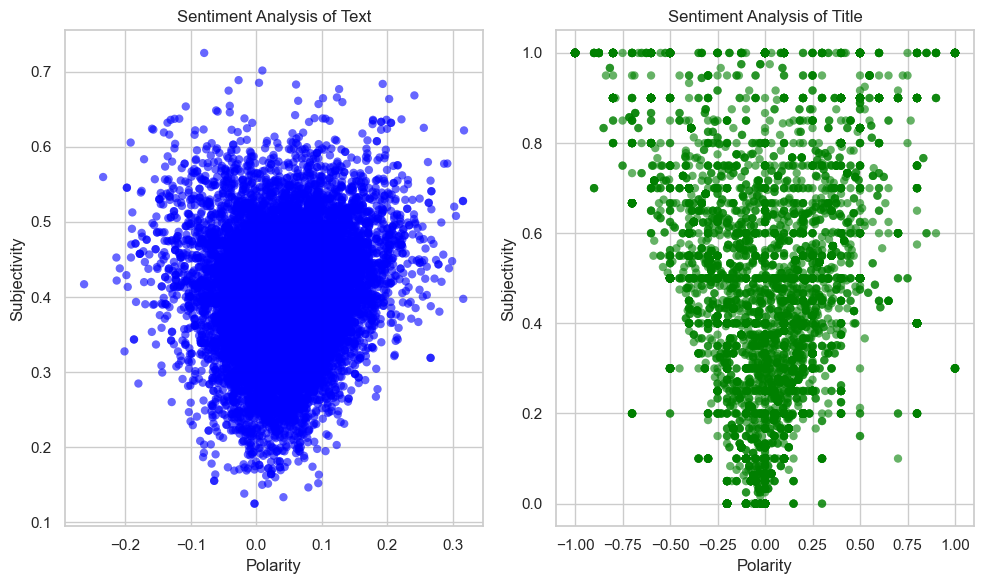

In [46]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a scatter plot for text sentiment
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.scatterplot(x='text_polarity', y='text_subjectivity', data=sentiment_df, alpha=0.6, edgecolor='none', color='blue')
plt.title('Sentiment Analysis of Text')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

# Create a scatter plot for title sentiment
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.scatterplot(x='title_polarity', y='title_subjectivity', data=sentiment_df, alpha=0.6, edgecolor='none', color='green')
plt.title('Sentiment Analysis of Title')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

To further deepen our understanding of the sentiment in the articles, we have further elaborated on the scatter plot, to enabling a distinction between fake and real news.

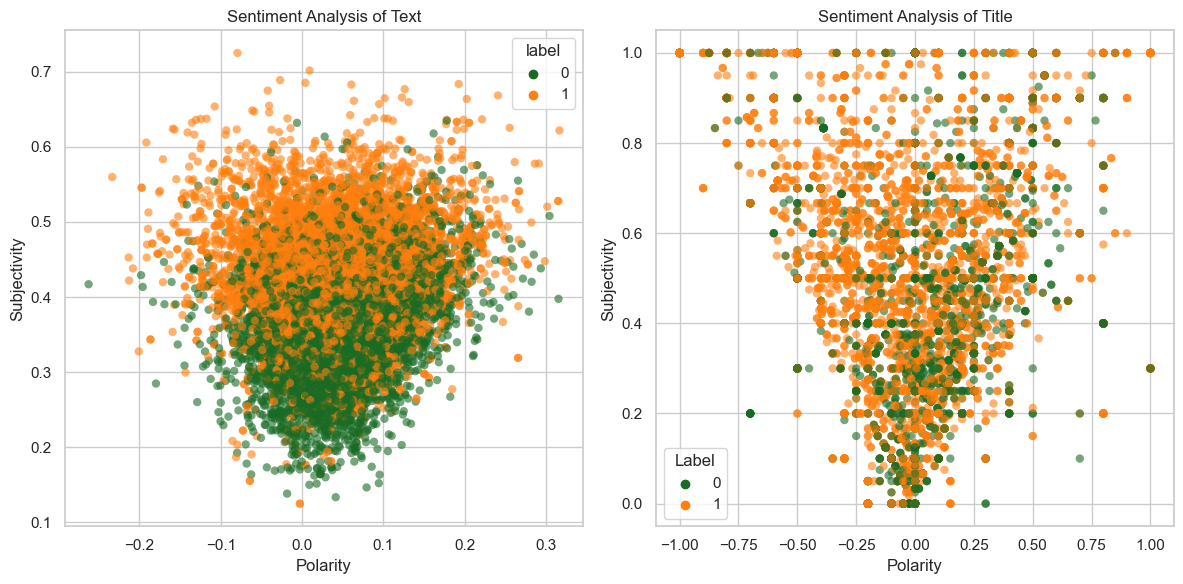

In [22]:
# Prepare the figure to host two plots
plt.figure(figsize=(12, 6))

custom_palette = ['#196B24', '#FF7F0E']  # Purple and blue

# Scatter plot for sentiment analysis of text
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.scatterplot(x='text_polarity', y='text_subjectivity', hue='label', data=sentiment_df, palette=custom_palette, alpha=0.6, edgecolor='none')
plt.title('Sentiment Analysis of Text')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

# Scatter plot for sentiment analysis of title
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.scatterplot(x='title_polarity', y='title_subjectivity', hue='label', data=sentiment_df, palette=custom_palette, alpha=0.6, edgecolor='none')
plt.title('Sentiment Analysis of Title')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

# Add a legend and show the plot
plt.legend(title='Label')
plt.tight_layout()
plt.show()

To further examine the results from above, we now vizualize the distribution of subjectivity scores between fake and real news by creating a density plot

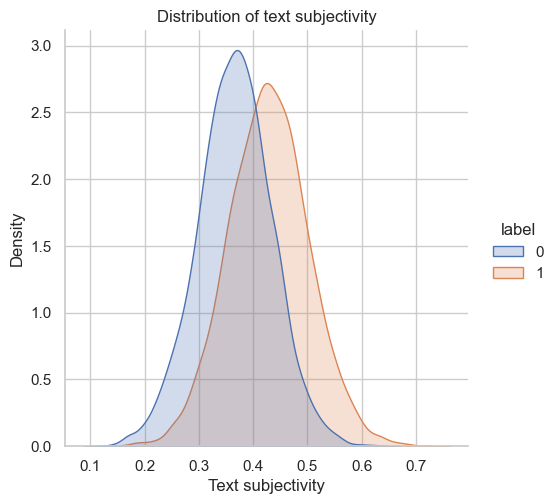

In [23]:
# label' is 0 for real news and 1 for fake news
sns.displot(sentiment_df, x="text_subjectivity", hue="label", kind="kde", fill=True)
plt.title('Distribution of text subjectivity')
plt.xlabel('Text subjectivity')
plt.ylabel('Density')
plt.show()

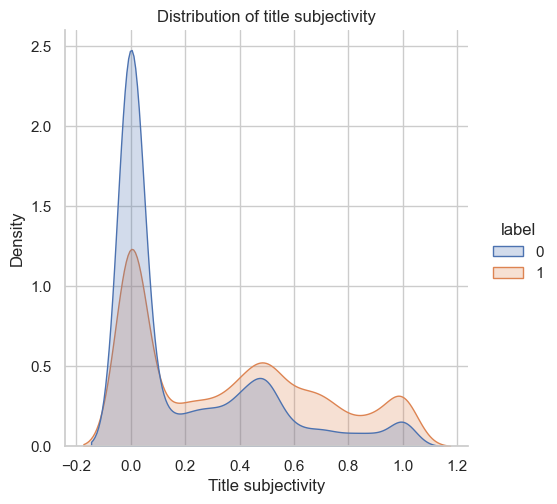

In [24]:
# label' is 0 for real news and 1 for fake news
sns.displot(sentiment_df, x="title_subjectivity", hue="label", kind="kde", fill=True)
plt.title('Distribution of title subjectivity')
plt.xlabel('Title subjectivity')
plt.ylabel('Density')
plt.show()

Below we create a correlation matrix and then correlation heatmaps to analyze whether hidden dependencies exits and to further deepen our analysis

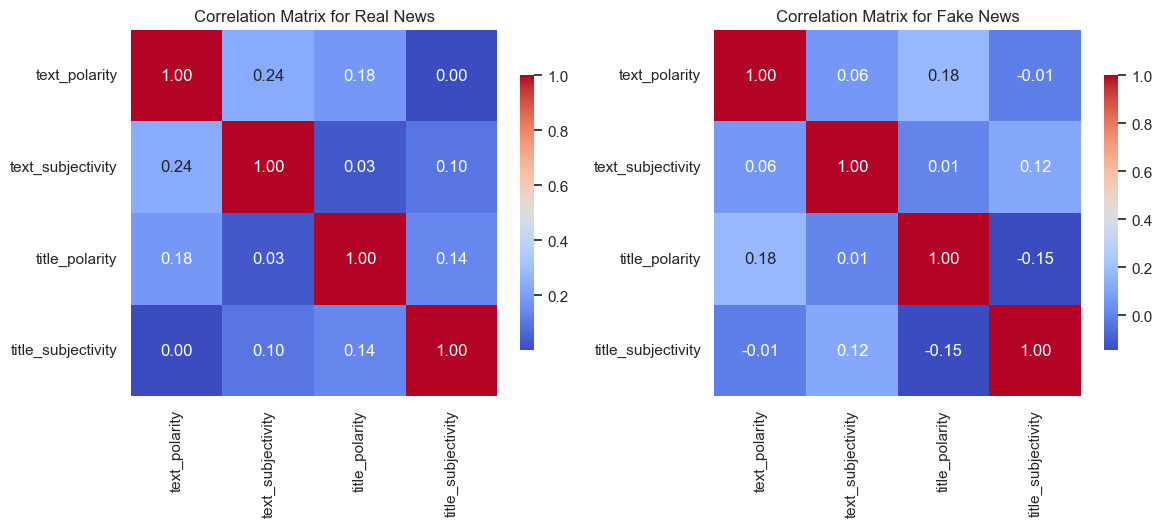

In [25]:
# Split the dataset into real and fake news
real_news = sentiment_df[sentiment_df['label'] == 0]  # 0 for real news
fake_news = sentiment_df[sentiment_df['label'] == 1]  # 1 for fake news

# Calculate correlation matrices
corr_matrix_real = real_news[['text_polarity', 'text_subjectivity', 'title_polarity', 'title_subjectivity']].corr()
corr_matrix_fake = fake_news[['text_polarity', 'text_subjectivity', 'title_polarity', 'title_subjectivity']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 5))

# Draw the heatmap for real news
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(corr_matrix_real, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .75})
plt.title('Correlation Matrix for Real News')

# Draw the heatmap for fake news
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.heatmap(corr_matrix_fake, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .75})
plt.title('Correlation Matrix for Fake News')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Lastly, it is relevant to look into other factors that might affect the sentiment. As we work with news articles and thus a large corpus of text, we look at the relationship between the text length and the sentiment, to ensure that we examine all relevant aspects of the dataset.

In [26]:
# Calculate text length (word count)
sentiment_df['text_length'] = sentiment_df['cleaned_text'].apply(lambda x: len(x.split()))

# First few rows to verify
print(sentiment_df[['cleaned_text', 'text_length']].head())

                                        cleaned_text  text_length
0  maniac want handmaid tale become realityaborti...          253
1  washington reuters senate main investigation a...          498
2  mean burn city downattorneys six police office...          327
3  secret donald trump got lot help russian gover...          239
4  chuck norris wrote jade helm 15 commentary con...          411


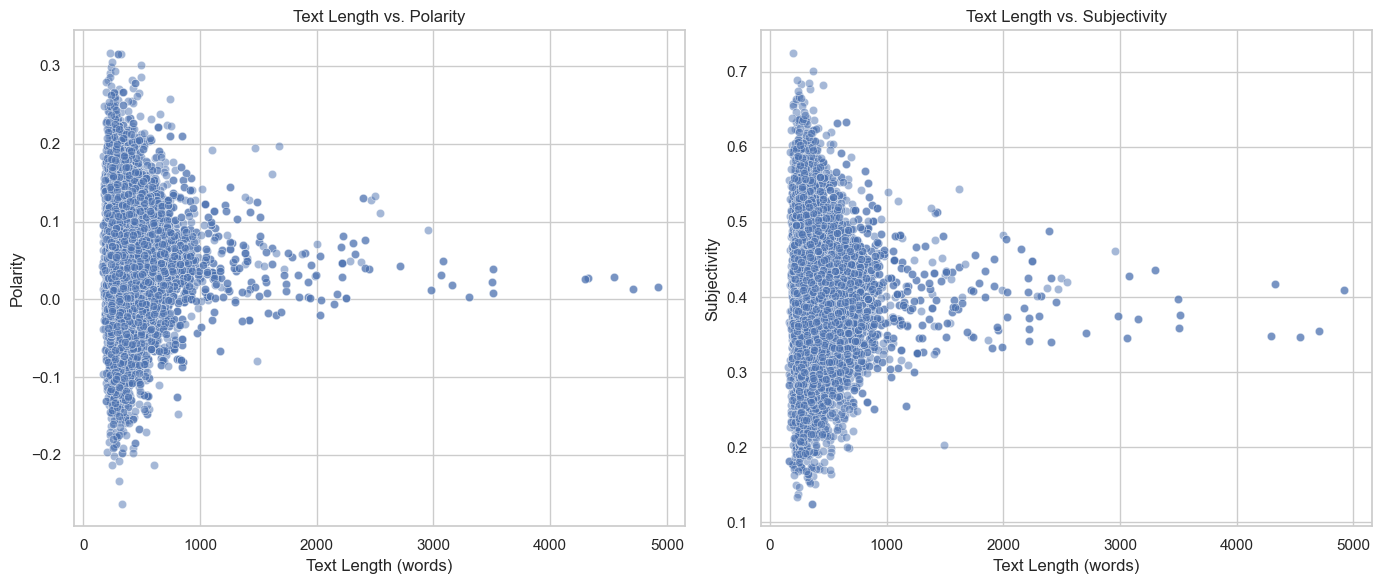

In [27]:
#Then we visualize the relationship between text length and sentiment
plt.figure(figsize=(14, 6))

# Scatter plot for Text Length vs. Polarity
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.scatterplot(x='text_length', y='text_polarity', data=sentiment_df, alpha=0.5)
plt.title('Text Length vs. Polarity')
plt.xlabel('Text Length (words)')
plt.ylabel('Polarity')

# Scatter plot for Text Length vs. Subjectivity
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.scatterplot(x='text_length', y='text_subjectivity', data=sentiment_df, alpha=0.5)
plt.title('Text Length vs. Subjectivity')
plt.xlabel('Text Length (words)')
plt.ylabel('Subjectivity')

# Show the plots
plt.tight_layout()
plt.show()

Due to the large amount of data, we also look at the relationship with a more statisitcal approach, to get a more detailed understanding of what is illustrated above in the scatter plot

In [28]:
# Calculate and print correlation coefficients
correlation_polarity = sentiment_df['text_length'].corr(sentiment_df['text_polarity'])
correlation_subjectivity = sentiment_df['text_length'].corr(sentiment_df['text_subjectivity'])

print("Correlation between Text Length and Polarity:", correlation_polarity)
print("Correlation between Text Length and Subjectivity:", correlation_subjectivity)

Correlation between Text Length and Polarity: -0.012691348092612159
Correlation between Text Length and Subjectivity: -0.024994700461007827


The results above show a very weak correlation, thus the text length does not have a large impact on the polarity or the subjectivity of the text.

### TTR ANALYSIS

In [47]:

# Make sure to download the necessary NLTK resource
nltk.download('punkt')

def calculate_ttr(text):
    if pd.isna(text):  # Check if the text is NaN
        return 0  # Return 0 or some predefined TTR value for NaN entries
    
    # Convert text to string in case it's not
    text = str(text).lower()

    # Tokenize the text
    tokens = word_tokenize(text)
    # Calculate number of unique words (types)
    types = len(set(tokens))
    # Calculate total number of words (tokens)
    tokens_count = len(tokens)
    # Calculate Type-Token Ratio (TTR)
    return types / tokens_count if tokens_count > 0 else 0  # Ensure no division by zero

# Loading DataFrame
ttr_df = pd.read_csv('text_balanced_subset.csv')


# Apply the TTR calculation to the 'cleaned_text' column
ttr_df['TTR'] = ttr_df['cleaned_text'].apply(calculate_ttr)

# Print the first few rows of the DataFrame to see the TTR values
print(ttr_df[['cleaned_text', 'TTR']].head())

# Saving the TTR feature to the feature csv file
# ttr_df.to_csv('Updated_with_TTR.csv', index=False)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/claramillekalo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                        cleaned_text       TTR
0  maniac want handmaid tale become realityaborti...  0.687747
1  washington reuters senate main investigation a...  0.646586
2  mean burn city downattorneys six police office...  0.657492
3  secret donald trump got lot help russian gover...  0.790795
4  chuck norris wrote jade helm 15 commentary con...  0.666667


In [30]:
max_ttr_index = ttr_df['TTR'].idxmax()

# Print the row with the highest TTR
print("Row with the highest TTR:")
print(ttr_df.loc[max_ttr_index])

Row with the highest TTR:
label                                                              1
cleaned_text       trump running confirmthere lot change end firs...
cleaned_subject                                             leftnews
cleaned_title      exclusive america 2021 hilarious poem describe...
token_count                                                       86
TTR                                                         0.896067
Name: 3395, dtype: object


Visualizing the TTR results

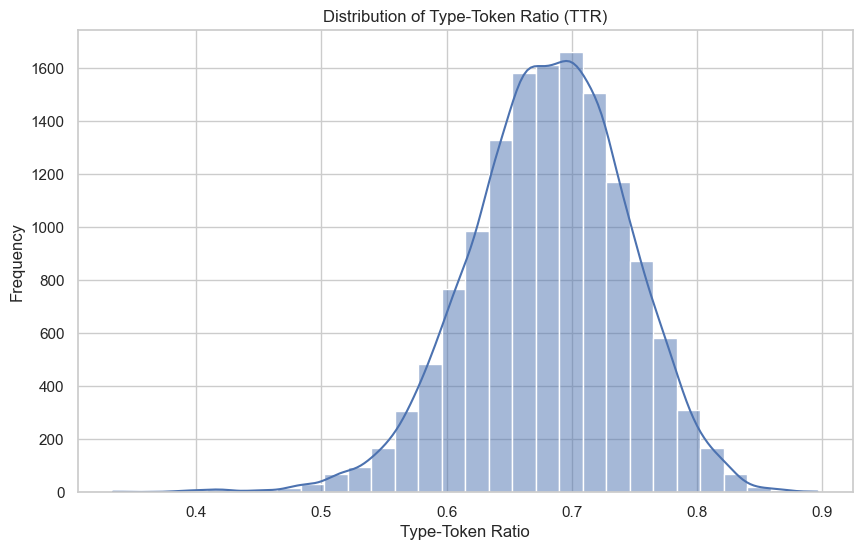

In [31]:
#Creating a histogram
# Plot a histogram of the TTR values
plt.figure(figsize=(10, 6))
sns.histplot(ttr_df['TTR'], kde=True, bins=30)  # kde adds a density plot
plt.title('Distribution of Type-Token Ratio (TTR)')
plt.xlabel('Type-Token Ratio')
plt.ylabel('Frequency')
plt.show()

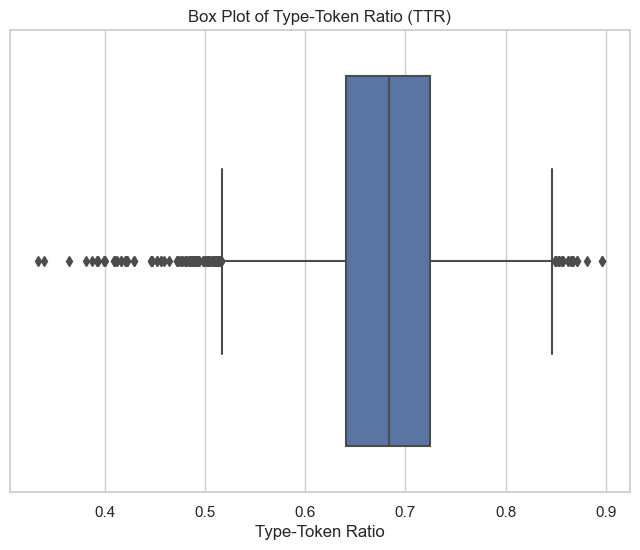

In [32]:
# Creating a Box plot

plt.figure(figsize=(8, 6))
sns.boxplot(x=ttr_df['TTR'])
plt.title('Box Plot of Type-Token Ratio (TTR)')
plt.xlabel('Type-Token Ratio')
plt.show()

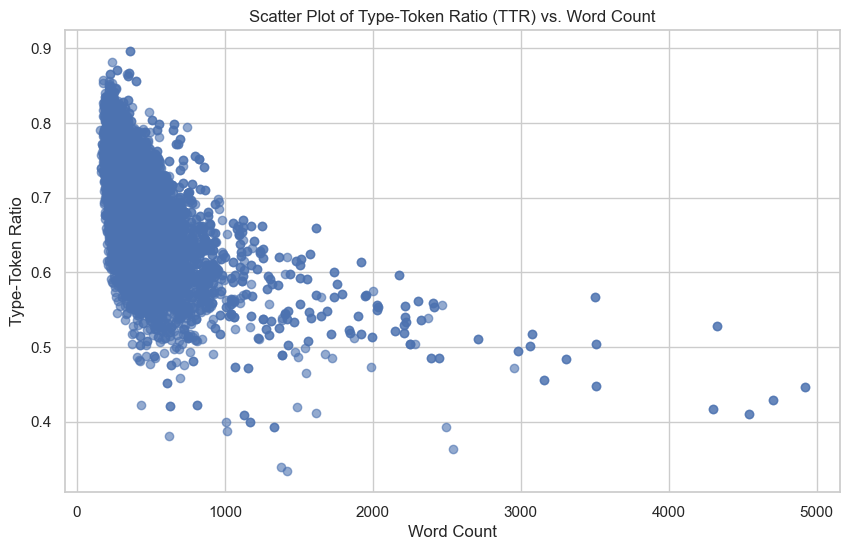

In [33]:
#Creating a Scatter Plot

# Plotting TTR against another variable 'WordCount'
ttr_df['WordCount'] = ttr_df['cleaned_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.scatter(ttr_df['WordCount'], ttr_df['TTR'], alpha=0.6)
plt.title('Scatter Plot of Type-Token Ratio (TTR) vs. Word Count')
plt.xlabel('Word Count')
plt.ylabel('Type-Token Ratio')
plt.show()

### DOCUMENT PERPLEXITY

In [48]:
from gensim import corpora, models
from gensim.models.ldamodel import LdaModel

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')

#Loading dataframe
perplexity_df = pd.read_csv('text_balanced_subset.csv')

perplexity_df['tokenized_text'] = perplexity_df['cleaned_text'].apply(word_tokenize)

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(perplexity_df['tokenized_text'])
corpus = [dictionary.doc2bow(text) for text in perplexity_df['tokenized_text']]

# Build LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=100,
                     update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

# Function to calculate a simplified document-level perplexity
def document_perplexity(lda_model, doc_bow):
    # Get topic probability distribution for the document
    doc_topics, word_topics, phi_values = lda_model.get_document_topics(doc_bow, per_word_topics=True)
    # Compute perplexity for the document (simplified version)
    doc_perplexity = np.exp(-np.mean([score for _, score in doc_topics]))
    return doc_perplexity

# Calculate document-level perplexity for each document in the corpus
perplexity_df['doc_perplexity'] = [document_perplexity(lda_model, corp) for corp in corpus]

# Save the updated DataFrame with the new 'doc_perplexity' feature
#perplexity_df.to_csv('Updated_with_Doc_Perplexity.csv', index=False)

# Print some of the updated DataFrame rows to check
print(perplexity_df[['cleaned_text', 'doc_perplexity']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/claramillekalo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                        cleaned_text  doc_perplexity
0  maniac want handmaid tale become realityaborti...        0.783165
1  washington reuters senate main investigation a...        0.882870
2  mean burn city downattorneys six police office...        0.781809
3  secret donald trump got lot help russian gover...        0.867632
4  chuck norris wrote jade helm 15 commentary con...        0.867399


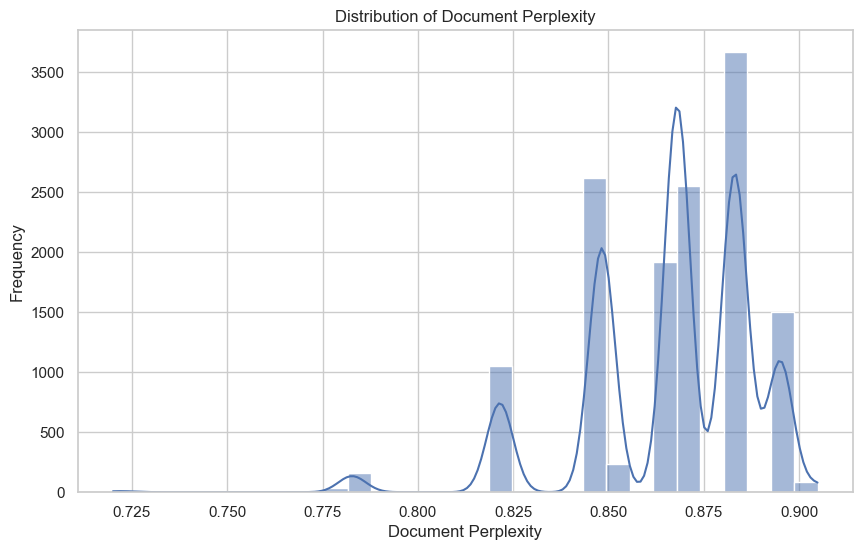

In [49]:
# Plot a histogram of the document perplexity
plt.figure(figsize=(10, 6))
sns.histplot(perplexity_df['doc_perplexity'], kde=True, bins=30)
plt.title('Distribution of Document Perplexity')
plt.xlabel('Document Perplexity')
plt.ylabel('Frequency')
plt.show()

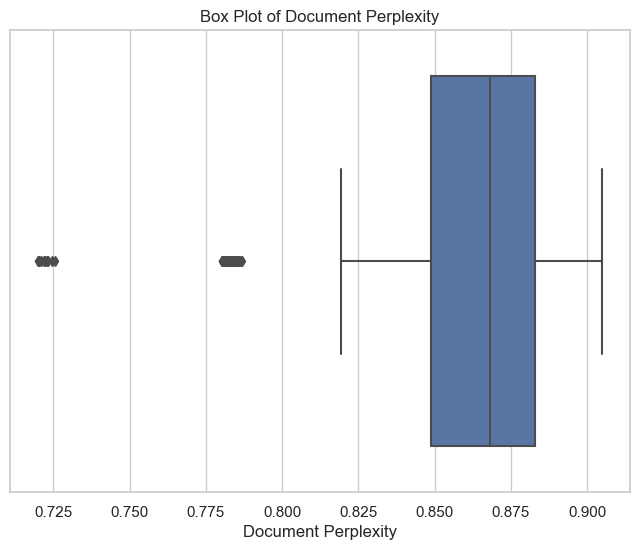

In [50]:
# Plot a box plot of document perplexity
plt.figure(figsize=(8, 6))
sns.boxplot(x=perplexity_df['doc_perplexity'])
plt.title('Box Plot of Document Perplexity')
plt.xlabel('Document Perplexity')
plt.show()

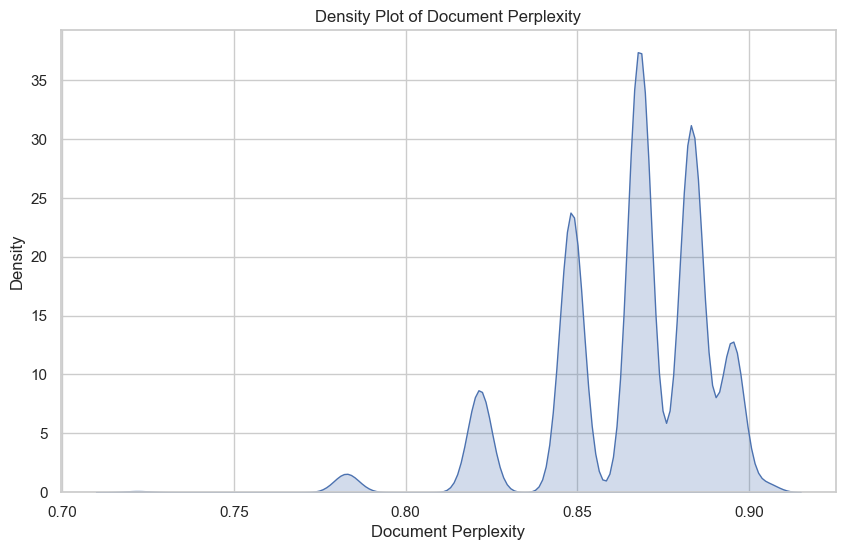

In [52]:
# Plot a density plot of document perplexity
plt.figure(figsize=(10, 6))
sns.kdeplot(perplexity_df['doc_perplexity'], fill=True)
plt.title('Density Plot of Document Perplexity')
plt.xlabel('Document Perplexity')
plt.ylabel('Density')
plt.show()

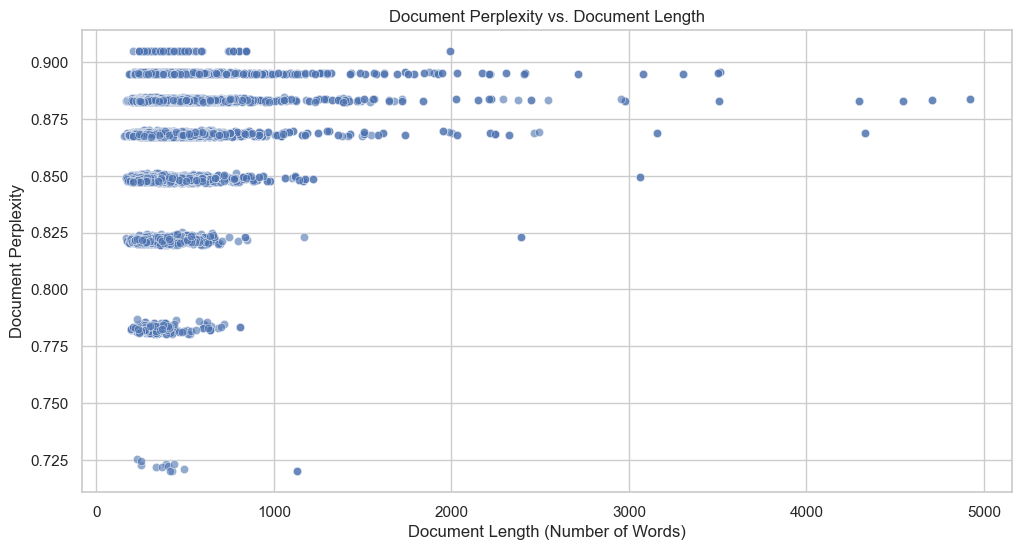

In [53]:
perplexity_df['document_length'] = perplexity_df['cleaned_text'].apply(lambda x: len(x.split()))

# Plotting
plt.figure(figsize=(12, 6))
sns.scatterplot(x='document_length', y='doc_perplexity', data=perplexity_df, alpha=0.6)
plt.title('Document Perplexity vs. Document Length')
plt.xlabel('Document Length (Number of Words)')
plt.ylabel('Document Perplexity')
plt.show()

### Mikkels
